In [9]:
import seaborn as sns

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
flights = sns.load_dataset('flights')

In [12]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


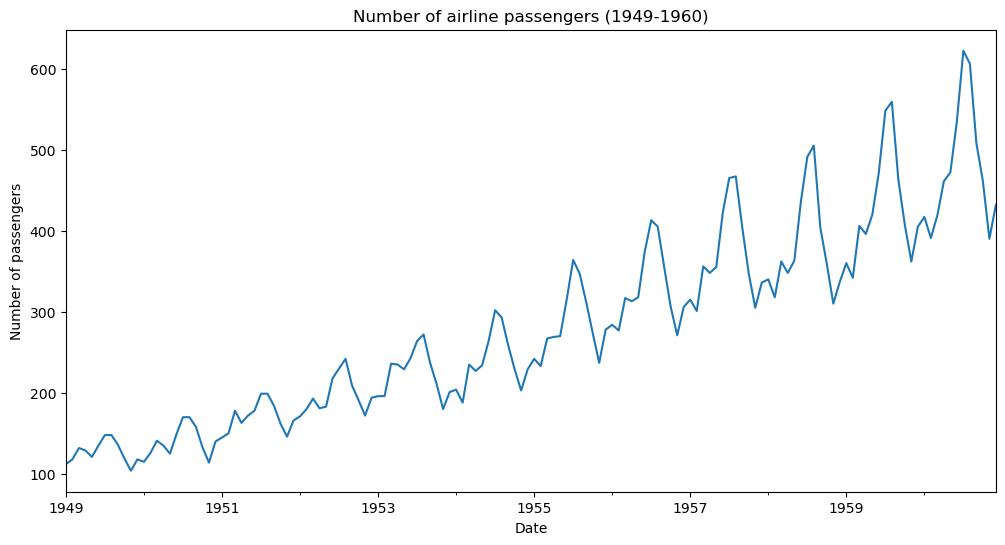

In [13]:
month_to_num ={
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

flights['month'] = flights['month'].map(month_to_num)

flights['date'] = pd.to_datetime(flights[['year','month']].assign(day=1))
flights_series =flights.set_index('date')['passengers']


plt.figure(figsize=(12,6))
flights_series.plot()
plt.title('Number of airline passengers (1949-1960)')
plt.xlabel('Date')
plt.ylabel('Number of passengers')
plt.show()

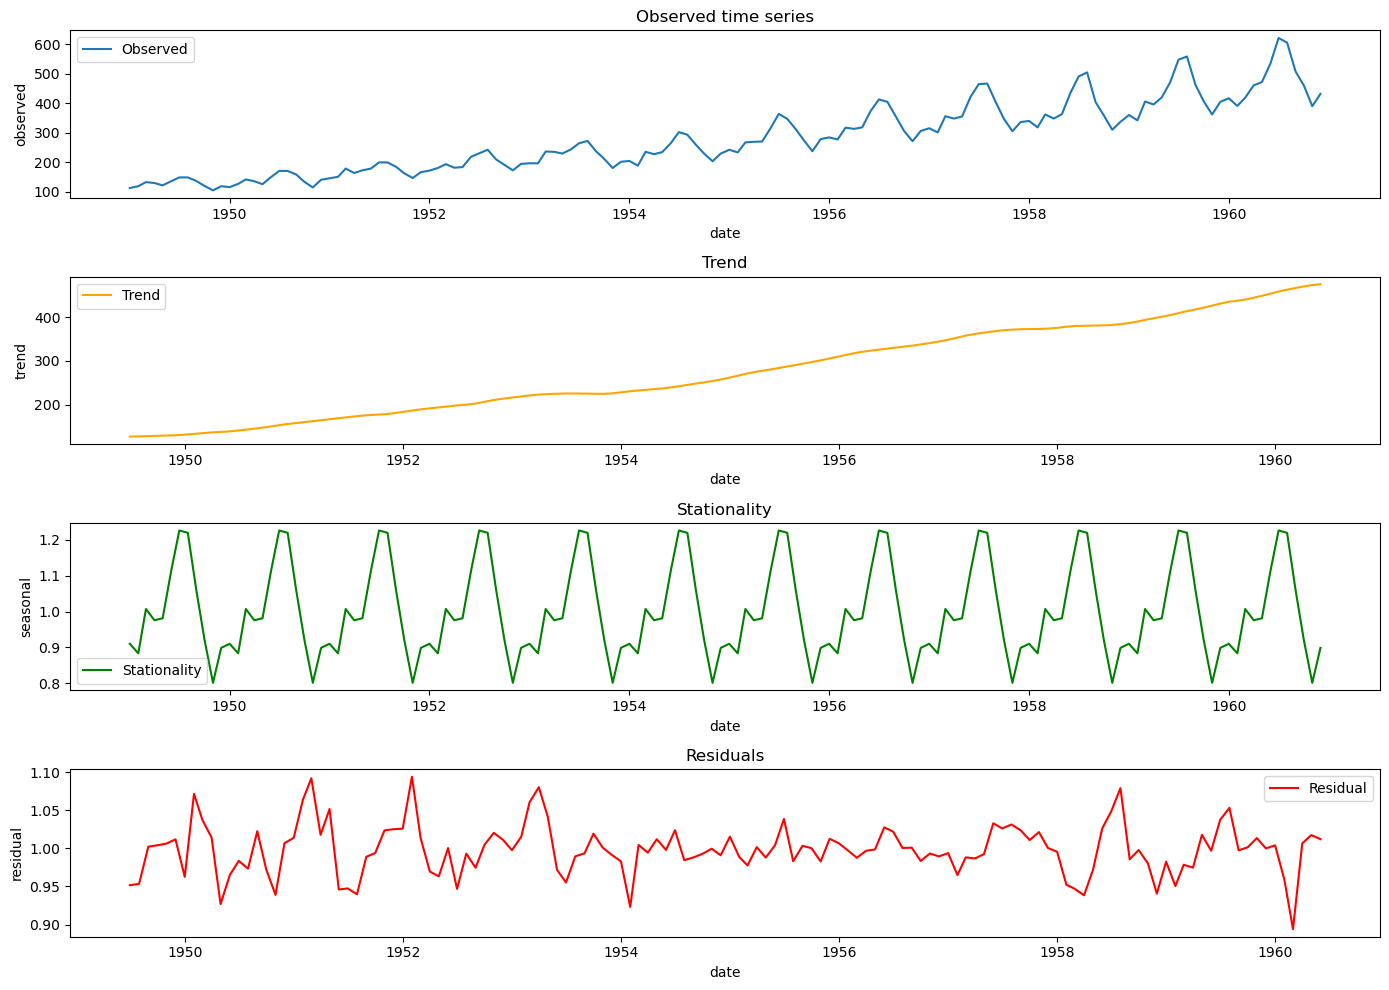

In [17]:
result = seasonal_decompose(flights_series, model='multiplicative')

decomp_df= pd.DataFrame({
    'observed': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'residual': result.resid
})

plt.figure(figsize=(14, 10))

plt.subplot(411)
sns.lineplot(data=decomp_df, x='date', y='observed', label='Observed')
plt.title('Observed time series')

plt.subplot(412)
sns.lineplot(data=decomp_df, x='date', y='trend', label='Trend', color='orange')
plt.title('Trend')

plt.subplot(413)
sns.lineplot(data=decomp_df, x='date', y='seasonal', label='Stationality', color='green')
plt.title('Stationality')

plt.subplot(414)
sns.lineplot(data=decomp_df, x='date', y='residual', label='Residual', color='red')
plt.title('Residuals')

plt.tight_layout()
plt.show()

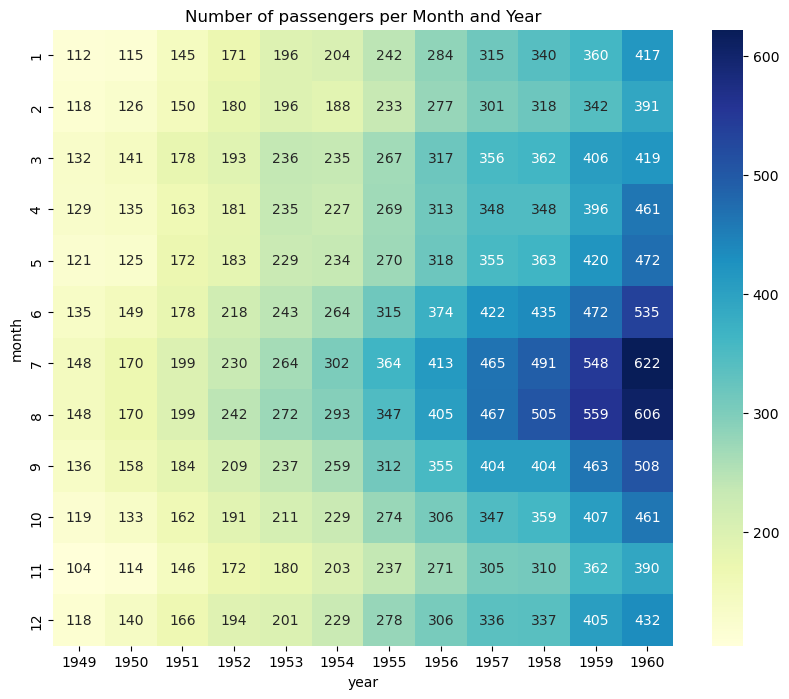

In [18]:
flight_pivot = flights.pivot(index='month', columns='year', values='passengers')

plt.figure(figsize=(10,8))
sns.heatmap(flight_pivot, annot=True, fmt="d", cmap='YlGnBu')

plt.title('Number of passengers per Month and Year')
plt.show()

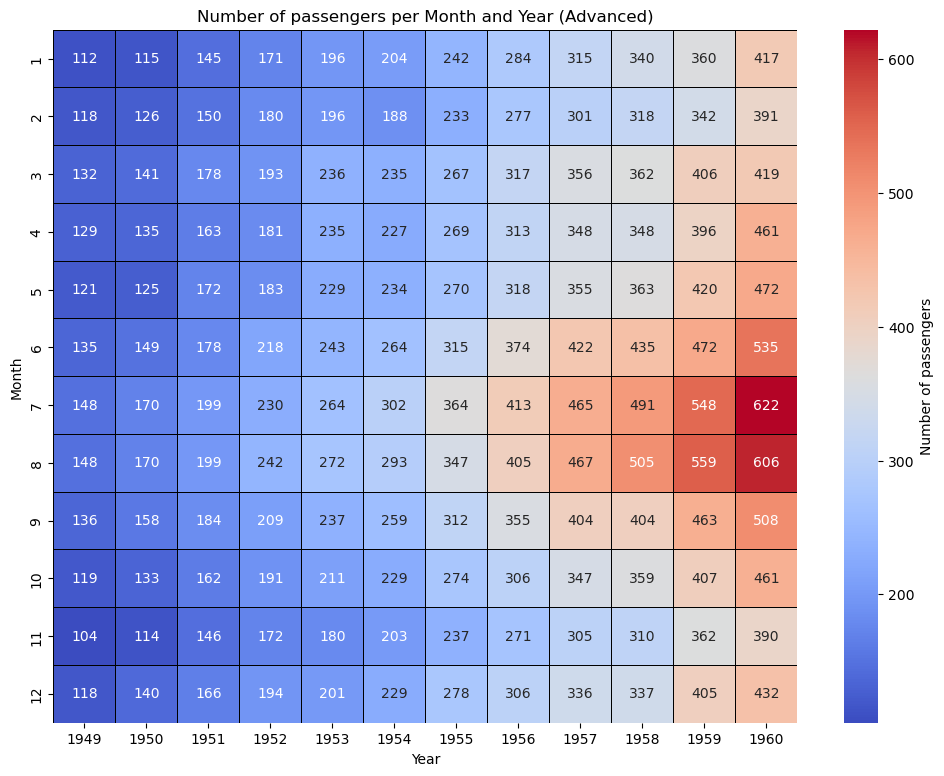

In [19]:
flight_pivot = flights.pivot(index='month', columns='year', values='passengers')

plt.figure(figsize=(12,9))
sns.heatmap(flight_pivot, annot=True, fmt="d", cmap='coolwarm', linewidths=.5, linecolor='black', cbar_kws={'label': 'Number of passengers'})

plt.title('Number of passengers per Month and Year (Advanced)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()